# Driven Damped Oscillations

For driven and underdamped motion, we have
$$
x(t) = A \cos(\omega t - \delta) + A_\text{tr} e^{-\beta t} \cos(\omega_1 t - \delta_\text{tr})
$$
or
$$
x(t) = A \cos(\omega t - \delta) + e^{-\beta t} \left( B_1 \cos \omega_1 t + B_2 \sin \omega_1 t \right),
$$
where $\omega_1 = \sqrt{\omega_0^2 - \beta^2}$.  The first term is the particular solution and the second the transient or homogeneous solution.

Following example 5.3 in the textbook, we'll take the driving frequency $\omega = 2\pi$ rad/s, the natural frequency $\omega_0 = 5\omega = 10\pi$ rad/s, the decay constant $\beta = \omega_0/20 = \pi/2$, and a driving amplitude of $f_0 = 1000$ N/kg.  We'll release the oscillator from rest at $x = 0$, from which (see textbook) we can find
$$
B_1 = -A \cos \delta \quad B_2 = -\frac{\omega}{\omega_1} A \sin\delta -\frac{\beta}{\omega_1} A \cos \delta.
$$

1.0552000280546547 0.020830320036217084
-1.0549711095080723 -0.057215832978742484


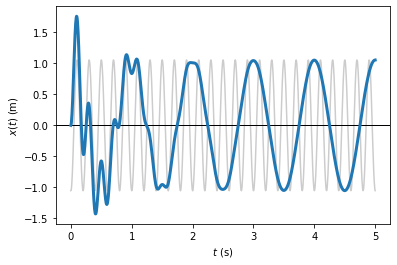

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters
f0 = 1000
w = 2*np.pi
w0 = 5*w
beta = w0 / 20
w1 = np.sqrt(w0**2 - beta**2)

A = np.sqrt( f0**2 / ( (w0**2 - w**2)**2 + 4*beta**2 * w**2 ))
delta = np.arctan(2*beta*w / (w0**2 - w**2))

B1 = -A * np.cos(delta)
B2 = -w/w1 * A * np.sin(delta) - beta/w1 * A * np.cos(delta)

print(A, delta)
print(B1, B2)

# create arrays of data
t = np.linspace(0, 5, 1000)
x = A * np.cos(w*t) + np.exp(-beta * t) * (B1 * np.cos(w1*t) + B2 * np.sin(w1*t))

# I'll plot the undamped motion too
x_sho = B1 * np.cos(w0*t) + B2 * np.sin(w0*t)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.axhline(0, color="black", lw=1)

ax.plot(t, x_sho, color="black", alpha=0.2)
ax.plot(t, x, lw = 3)

ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$x(t)$ (m)")

plt.savefig("fig_driving1.pdf")

Now I'd like to do a different plot that shows the particular and transient solutions separately:

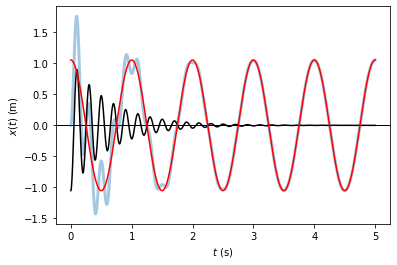

In [18]:
# create arrays of data
t = np.linspace(0, 5, 1000)
xp = A * np.cos(w*t)
xtr = np.exp(-beta * t) * (B1 * np.cos(w1*t) + B2 * np.sin(w1*t))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.axhline(0, color="black", lw=1)

ax.plot(t, xp + xtr, lw = 3, alpha = 0.4)
ax.plot(t, xtr, color="black", alpha=1)
ax.plot(t, xp, alpha = 1, color="red")


ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$x(t)$ (m)")

plt.savefig("fig_driving2.pdf")